# Stochastic gradient descent (随机梯度下降)

和 batch gradient descent 类似, 不过每计算一个样本的代价后就更新${\theta}$.

相比于 batch gradient descent 的优点是它在处理大量样本(通常超过100000)时, 效率更高.

stochastic gradient descent 的缺点是收敛不是平缓的, 画出代价函数会发现代价函数是波动下降的.
而且算法运行到最后可能会在最优值周围不断徘徊, 无法继续收敛.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from util import *

C:\Users\Alex\Anaconda3\envs\MachineLearning\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## 随机梯度下降算法

In [2]:
def stochastic_gradient_descent(theta, X, y, epoch, alpha=0.01):
    """
    Fit linear regression using statistic gradient descent algorithm,
    return gradient and cost

    Args:
        theta : R(n), parameters for linear regression
        X: R(m*n), m number of samples, n number of features
        y: R(m) predictions
        epoch: number of iterations
        alpha: learning rate. default 0.01
    """
    m = X.shape[0]
    n = X.shape[1]
    _theta = theta.copy()  # make a copy to avoid confusion
    cost_data = []
    for _ in range(epoch):
        for i in range(m):
            _theta = _theta - alpha * gradient(_theta, X[i,:].reshape(1, n), [y[i]]) / m
            cost_data.append(cost(_theta, X, y))

    return _theta, cost_data

## 使用第一个单变量数据集测试

可以看到代价函数下降过程是波动的. 注意横坐标是每次更新${\theta}$就加一, 所以需要除以m才是一次迭代.

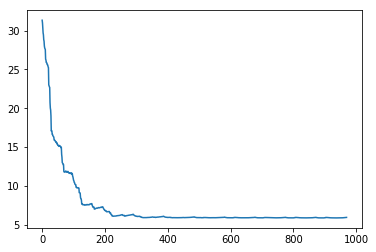

In [3]:
data = pd.read_csv('ex1data1.txt', names=['population', 'profit'])
X = get_X(data) 
y = get_y(data)
theta = np.zeros(X.shape[1])
epoch = 10
final_theta, cost_data = stochastic_gradient_descent(theta, X, y, epoch)
plt.plot(np.arange(len(cost_data)), cost_data)

## 使用多变量数据集测试

同样, 代价函数下降是波动的.

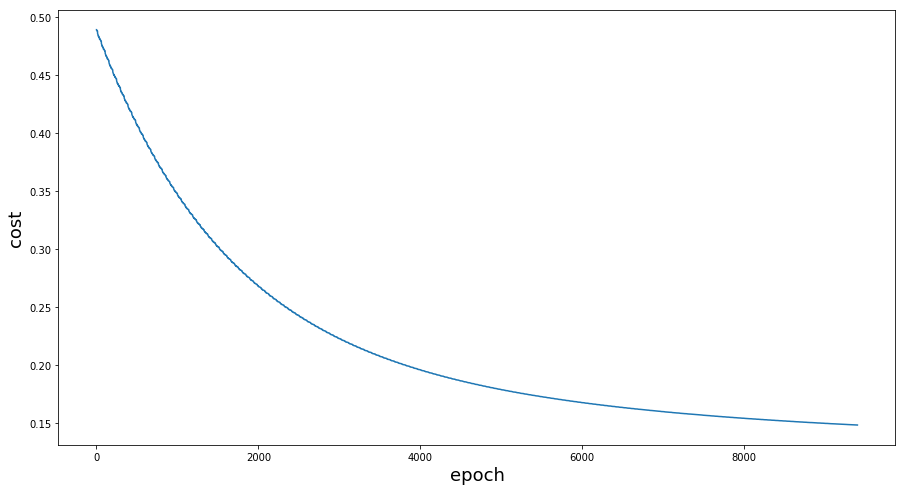

In [4]:
# read data
raw_data = pd.read_csv('ex1data2.txt', names=['square', 'bedrooms', 'price'])

# prepare data
data = normalize_feature(raw_data)
X = get_X(data)
y = get_y(data)
epoch = 200
theta = np.zeros(X.shape[1]);

# start trainning
final_theta, cost_data = stochastic_gradient_descent(theta, X, y, epoch, 0.01)

# visualize cost function
fig = plt.figure(figsize=(15, 8))
ax = plt.subplot(111)
ax.plot(cost_data)
plt.xlabel('epoch', fontsize=18)
plt.ylabel('cost', fontsize=18)
plt.show()